### Load Basic Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify



In [2]:
#conda install -c conda-forge squarify


### Loading the clean data after EDA

In [3]:
data = pd.read_csv('../data/data_clean.csv', index_col= None)

In [4]:
data.head(2)

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,TAS,TAD,PP,AgeCat,bmi,bmi_cat,fram,esc
0,f,168,62.0,normal,normal,no,no,si,0,50,110.0,80.0,30.0,"[50, 60)",21.97,Peso normal,13,0
1,m,156,85.0,alto,normal,no,no,si,1,55,140.0,90.0,50.0,"[50, 60)",34.93,Obesidad,15,5


**The next step is to create some visuals in order to understand further our dataset by exploring relationships existent in it. For this, it is very useful to use  Pandas's integration with the Matplotlib visualisation library, allowing figures to be created directly from DataFrame and Series data objects. Also the `seaborn` library that we imported previously. Seaborn facilitates strong attractive statistical graphics that are easy to code**

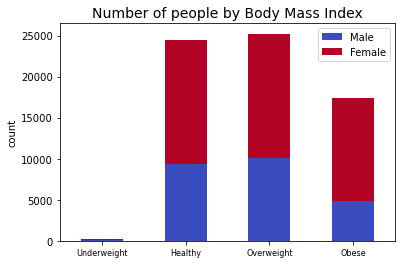

In [5]:
data['bmi_cat'] = data['bmi_cat'].replace({'Bajo peso': 'Underweight', 'Obesidad': 'Obese', 'Peso normal': 'Healthy', 'Sobrepeso': 'Overweight'})
data_BMI = data.groupby(['bmi_cat', 'gender']).size().reset_index().pivot(columns='gender', index='bmi_cat', values=0)

data_BMI.reindex(["Underweight", "Healthy", "Overweight", "Obese"]).plot(kind="bar", stacked=True, colormap='coolwarm')
plt.title("Number of people by Body Mass Index",  fontsize=14)
plt.ylabel("count")
plt.xlabel(None) 
plt.legend(["Male", "Female"])


plt.xticks(fontsize = 8, rotation = 0)
plt.show()

**As we can see, we find an unbalanced dataset regarding the number of individuals in each BMI category. The advantage of `bar charts` over other chart types is that the human eye has evolved a refined ability to compare the length of objects, as opposed to angle or area**

[Text(0.5, 0, 'Cholesterol')]

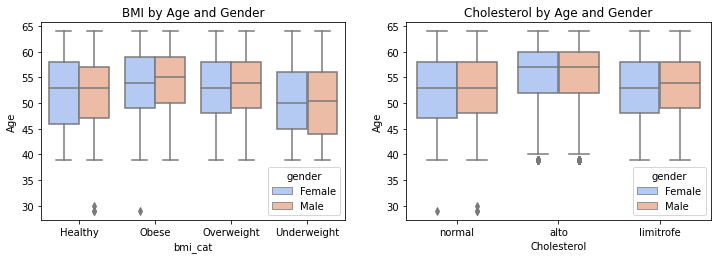

In [6]:
#QUE NOMBRE TENDRIAN LAS CATEGORIAS DE COLESTEROL????


fig = plt.figure(figsize=(12, 8))
sub1 = plt.subplot(2, 2, 1)

data['gender'] = data['gender'].replace({'m': 'Male',  'f': 'Female'})

ax1 = sns.boxplot(x="bmi_cat", y="AgeinYr", data=data, hue = 'gender', palette = "coolwarm")
plt.title("BMI by Age and Gender")
ax1.set(ylabel="Age")

plt.subplot(2, 2, 2)

ax3 = sns.boxplot(x="cholesterol", y="AgeinYr", hue = 'gender', data=data, palette = "coolwarm")
plt.title("Cholesterol by Age and Gender")
ax3.set(ylabel="Age")
ax3.set(xlabel="Cholesterol")




**A `boxplot` is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed**

**These boxplots allow us to visualize how the categories of BMI and Cholesterol are distributed according to gender and age**

Text(0.5, 1.0, 'Distribution of BMI by Blood sugar')

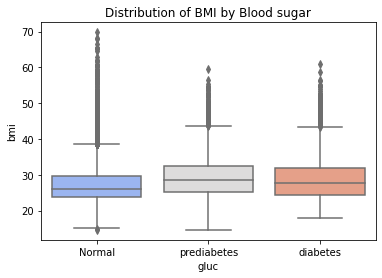

In [7]:
sns.boxplot(data=data, x='gluc', y='bmi', palette = "coolwarm")
plt.xticks([0,1,2],['Normal', 'prediabetes','diabetes'])
plt.ylabel('bmi')
plt.title('Distribution of BMI by Blood sugar')

**These boxplots allow us to visualize how the categories of BMI and Blood Sugar are distributed according glucose categories**

<Figure size 864x576 with 0 Axes>

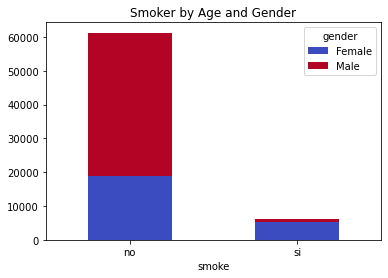

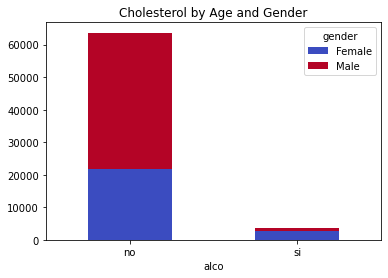

In [8]:

fig = plt.figure(figsize=(12, 8))

data['gender'] = data['gender'].replace({'m': 'Male',  'f': 'Female'})
data['smoke'] = data['smoke'].replace({1: 'Smoker',  0: 'Non-Smoker'})
data['alco'] = data['alco'].replace({1: 'Yes',  0: 'No'})


data_smoker = data.groupby(['smoke', 'gender']).size().reset_index().pivot(columns='gender', index='smoke', values=0)

data_alco = data.groupby(['alco', 'gender']).size().reset_index().pivot(columns='gender', index='alco', values=0)


data_smoker.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Smoker by Age and Gender")
ax1.set(ylabel="Age")
plt.xticks(fontsize = 10, rotation = 0)



data_alco.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title("Cholesterol by Age and Gender")
ax3.set(ylabel="Age")
ax3.set(xlabel="Cholesterol")
plt.xticks(fontsize = 10, rotation = 0)


plt.show()

**The `stacked bar chart` extends the standard bar chart from looking at numeric values across one categorical variable to two. Each bar in a standard bar chart is divided into a number of sub-bars stacked end to end, each one corresponding to a level of the second categorical variable**

**In this case, the stacked bar graph allows us to see the proportion between smokers and non-smokers women and men. It also allows us to observe the unbalanced data is between smokers and non-smokers**

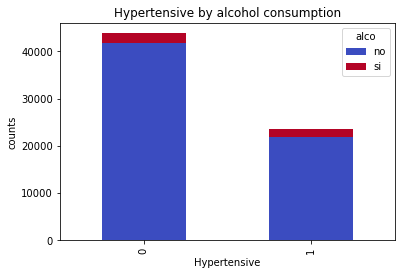

In [9]:
mask_hta_alta = data["TAS"] >= 140
mask_hta_baja = data["TAD"] >= 90
data["hipertenso"] = np.where(mask_hta_alta | mask_hta_baja, 1 ,0)
data['alco'] = data['alco'].replace({1: 'Yes',  0: 'No'})

data_hyper_alco = data.groupby(['hipertenso', 'alco']).size().reset_index().pivot(columns='alco', index='hipertenso', values=0)

data_hyper_alco.plot(kind='bar', stacked=True, colormap='coolwarm')

plt.title("Hypertensive by alcohol consumption")
plt.xlabel("Hypertensive")
plt.ylabel("counts")
plt.show()


**This stacked bar allows us to see that the proportion of alcohol drinkers is not very significant among the population with o without hypertension.**

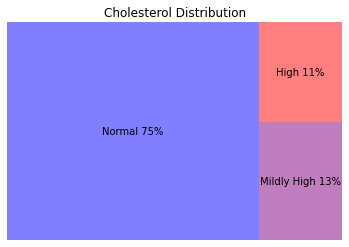

In [10]:
col_count = list(data.cholesterol.value_counts())
col_labels = ['Normal', 'Mildly High','High']
col_precent = list((data.cholesterol.value_counts(1)*100).round(0))
gen_label = zip(col_labels,col_precent)
labels =[str(l+' '+str(int(p))+'%') for l,p in gen_label]

squarify.plot(sizes=col_count, label=labels, color=['b','purple','r'], text_kwargs={'fontsize':10}, alpha= .5)
plt.title('Cholesterol Distribution')
plt.axis('off')

plt.show()

**`Treemaps` are visualisations that split the area of our chart to display the value of our datapoints. At their simplest, they display shapes in sizes appropriate to their value, so bigger rectangles represent higher values. Python allows us to create these charts quite easily with the `squarify` library**

**In this treemap we can see the distribution of cholesterol subcategories**


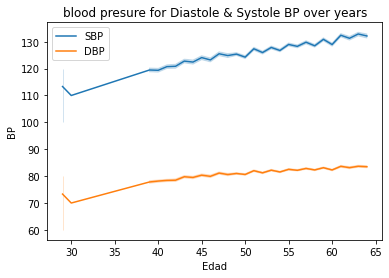

In [11]:
sns.lineplot(data=data,x='AgeinYr',y='TAS')
sns.lineplot(data=data,x='AgeinYr',y='TAD')
plt.title('blood presure for Diastole & Systole BP over years')

plt.xlabel('Edad')
plt.ylabel('BP')
plt.legend(['SBP','DBP'])

**In this `line plot` we can see the relationship between age and blood pressure, specifying between systolic blood pressure and diastolic blood pressure**

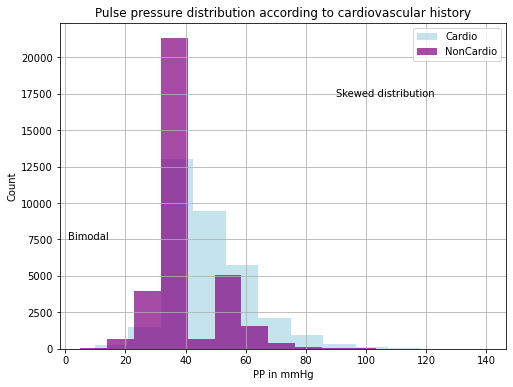

In [12]:
pp_cardio = data.PP[data.cardio ==1]
pp_NOcardio = data.PP[data.cardio ==0]
pp_cardio.describe()
plt.figure(figsize=(8,6))
pp_cardio.hist(alpha=0.7, color='lightBlue', bins=12)
pp_NOcardio.hist(alpha=0.7, color='Purple', bins=14)
plt.legend(['Cardio','NonCardio'])
plt.text(90,17300,'Skewed distribution')
plt.text(1,7500,'Bimodal')
plt.xlabel('PP in mmHg')
plt.ylabel('Count')
plt.title('Pulse pressure distribution according to cardiovascular history')
plt.show()

**We can compare histograms to see distributions according to certain variables. In this case we can see a bimodal distribution and a skewed distribution in Pulse Pressure acording to cardiovascular history**

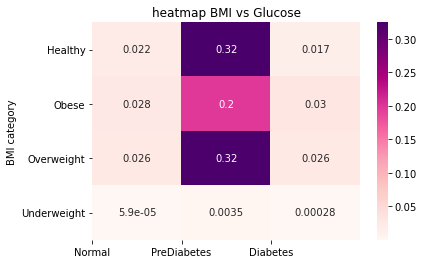

In [13]:
sns.heatmap(pd.crosstab(data.bmi_cat, data.gluc, normalize='all'), annot=True, cmap = 'RdPu')
plt.title('heatmap BMI vs Glucose')
plt.ylabel('BMI category'), plt.xlabel(' ')
plt.xticks([0,1,2],['Normal', 'PreDiabetes','Diabetes'])
plt.show()

**The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. Output of the crosstab can be passed to a seaborn heatmap in order to visually summarize the data**

**We can also explore if there is any strong correlation between the parameters. For this, we can use the Pearson correlation coefficient because it is a good parameter to know the strength of the linear relationship between two variables. 
Correlation analysis is important because highly correlated variables can hurt some models or in other cases, could provide little extra information and considering them can be computational expensive without any real benefit. Also, knowing if our variables display a linear relationship can help us choose which machine learning algorithm is more suitable for our data**

**In order to perform the correlation analysis with all our variables, we first need to apply the function `factorize` to the columns containing non continuos variables in order to obtain a numeric representation of the categorical values contained in the dataset**

In [14]:
categorical_variables = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi_cat', 'AgeCat', 'hipertenso']

In [15]:
data[categorical_variables] = data[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [16]:
corr = data.dropna().corr(method = 'pearson')

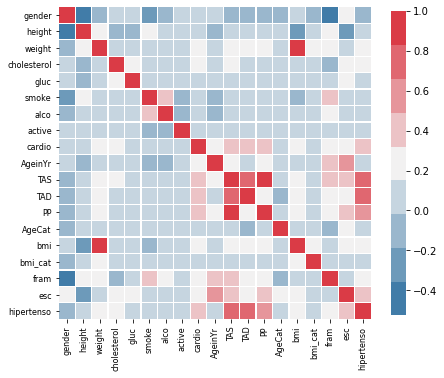

In [17]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);

**We can observe in the heatmap that some of the variables show a coefficient of ~0.8 or -0.6, but most of them display a very low correlation coefficient. Most of these variables are related to each other: weight with BMI or hypertension with blood pressure variables. So we can conclude that there is no strong linear correlation between our variables**

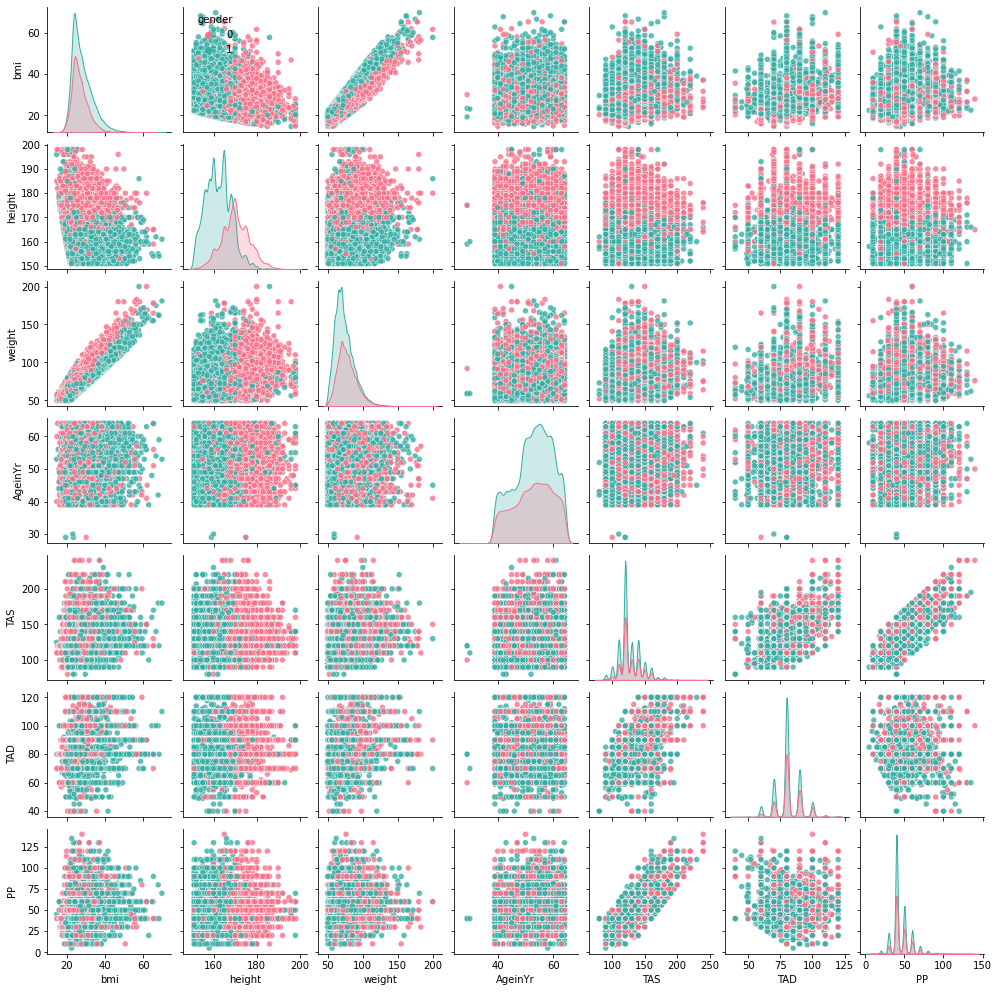

In [18]:
g = sns.pairplot(data, x_vars = ['bmi', 'height', 'weight', 'AgeinYr', 'TAS', 'TAD', 'PP'], 
               y_vars = ['bmi', 'height', 'weight', 'AgeinYr', 'TAS', 'TAD', 'PP'], 
               hue = 'gender', 
               kind= 'scatter',
               palette = 'husl',
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

**We can use `pairplot` function to visualize the relationship between the different numerical variables. We are able to use the parameter `hue` to show with different color in the plot, the different levels of a categorical variable. In our case we use "gender"**